## Stable Diffusion 


In [10]:
!pip install diffusers transformers tokenizers

Note you need to login to use the pre-trained weights! You should register an account at Huggingface, then use one `Access Tokens` to login in the following block.

In [11]:
# from huggingface_hub import notebook_login

# notebook_login()

Make sure you have a runtime with GPU!

## Loading Stable Diffusion

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

def plt_show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [13]:
# assert torch.cuda.is_available()
# !nvidia-smi

Here `fp16` checkpoint is loaded just to save memory and compute time. if you have a great gpu, you can remove the line `revision="fp16", torch_dtype=torch.float16`.

In [14]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True,
    revision="fp16", torch_dtype=torch.float16
).to("cpu")
# Disable the safety checkers
def dummy_checker(images, **kwargs): return images, [False] * images.shape[0]
pipe.safety_checker = dummy_checker

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
unet/diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. 

In [15]:
def dummy_checker(images, **kwargs): return images, [False] * images.shape[0]
pipe.safety_checker = dummy_checker

## Generative Playground

In [16]:
prompt = "a lovely cat running in the desert in Van Gogh style, trending art."
image = pipe(prompt).images[0]  

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat.png")
image

  0%|          | 0/50 [00:00<?, ?it/s]

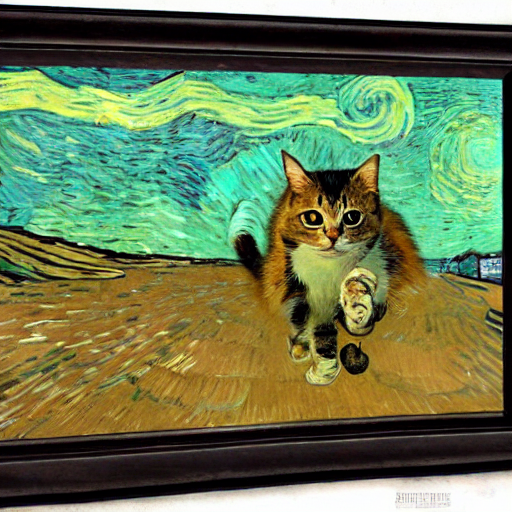

In [ ]:
image #  

### Fixing the random seed

  0%|          | 0/51 [00:00<?, ?it/s]

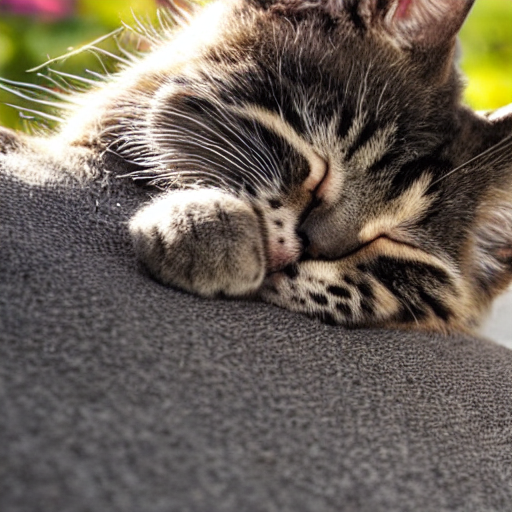

In [ ]:
generator = torch.Generator("cuda").manual_seed(1024)

prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, generator=generator).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat_sun.png")
image

### Changing (Denoising) Diffusion steps

  0%|          | 0/26 [00:00<?, ?it/s]

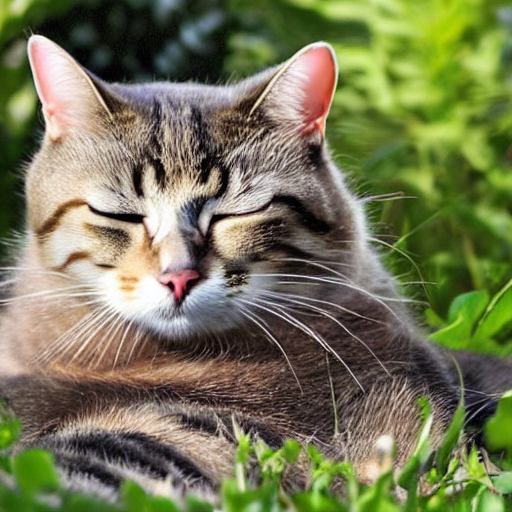

In [ ]:
prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, num_inference_steps=25).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat_sun.png")
image

### Adding Negative prompt

Adding negative prompt can control what you do not want.

  0%|          | 0/51 [00:00<?, ?it/s]

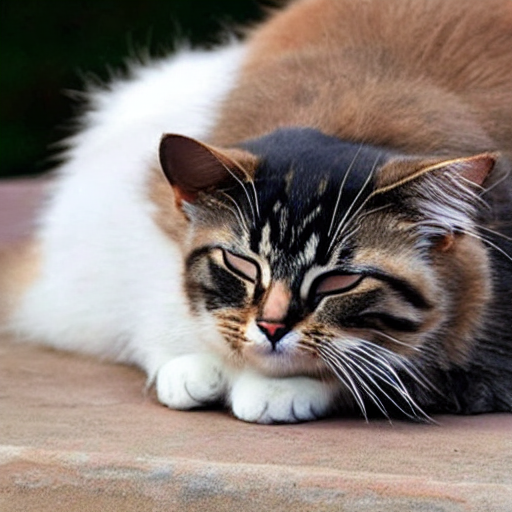

In [ ]:
prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, generator=generator,
               negative_prompt="tree and leaves").images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat_sun_no_trees.png")
image